In [30]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer  # To load the dataset
from sklearn.metrics import accuracy_score  # To evaluate the model

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


from collections import Counter

In [6]:
# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()  # Load the dataset
X = data.data  # Features (independent variables)
y = data.target  # Target (dependent variable: 0 = malignant, 1 = benign)


In [8]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Step 3: Standardize the features
scaler = StandardScaler()  # Initialize the scaler
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Transform the testing data using the same scaler

In [26]:
class KMeans:
    def __init__(self, k=2, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(42)
        random_indices = np.random.permutation(X.shape[0])[:self.k]
        self.centroids = X[random_indices]

        for i in range(self.max_iters):
            # Assign clusters
            self.labels = self._assign_clusters(X)

            # Compute new centroids
            new_centroids = self._compute_centroids(X)

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X):
        return np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

    def predict(self, X):
        return self._assign_clusters(X)

# Example Dataset
X = np.array([
    [1, 2], [2, 3], [3, 4],
    [10, 10], [11, 11], [12, 12]
])

# Apply K-Means
kmeans = KMeans(k=2, max_iters=100)
kmeans.fit(X)

print("Centroids:", kmeans.centroids)
print("Labels:", kmeans.labels)


Centroids: [[ 2.  3.]
 [11. 11.]]
Labels: [0 0 0 1 1 1]


In [20]:
kmeans.labels.shape

(455,)

In [22]:
accuracy = accuracy_score(y_test, kmeans.labels[:114])  # Calculate accuracy
print("\nModel evaluation:")
print(f"Accuracy of KNN model: {accuracy:.2f}")


Model evaluation:
Accuracy of KNN model: 0.46


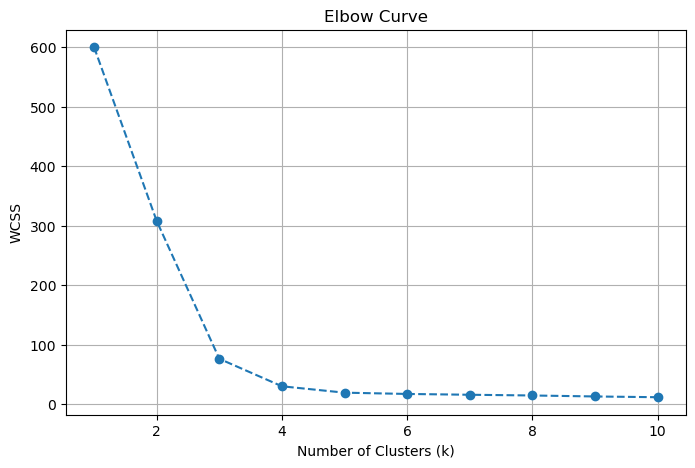

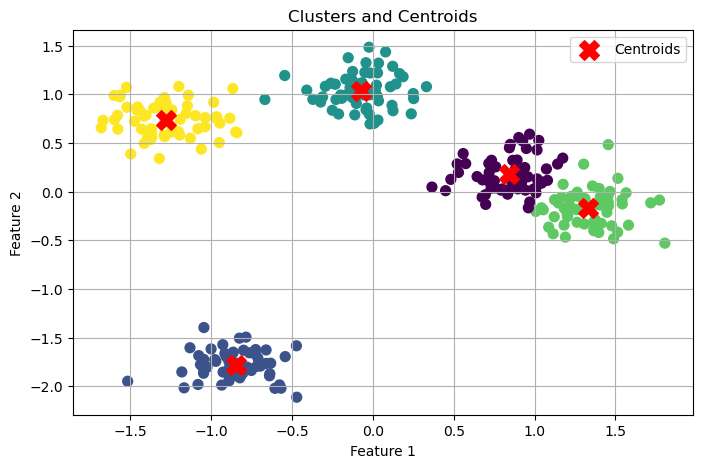

In [32]:
# Step 1: Generate or load a dataset
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=42)

# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute WCSS for a range of k
wcss = []
k_range = range(1, 11)  # Test k values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is equivalent to WCSS

# Step 4: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# Step 5: Apply KMeans using the optimal k (assume it's 5 for this example)
optimal_k = 5
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(X_scaled)

# Step 6: Visualize the clustered data
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], 
            color='red', marker='X', s=200, label="Centroids")
plt.title("Clusters and Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()
